In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use("fivethirtyeight")

path = ""

In [ ]:
# Uncomment cell if using Google Colab

from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/My Drive/csc-461-final-project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Statewide = pd.read_csv(path + "data/Statewide.csv")
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
Statewide_target = Statewide["TGT STATEWIDE PRIMARY"]
Statewide = Statewide.drop(["TGT STATEWIDE PRIMARY", "TGT PARTY AFFILIATION"], axis = 1)

In [ ]:
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0


In [ ]:
Statewide_target.head()

0    0
1    0
2    1
3    1
4    0
Name: TGT STATEWIDE PRIMARY, dtype: int64

In [ ]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(Statewide, Statewide_target, test_size = .50, stratify = Statewide_target)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

decisionTree = tree.DecisionTreeClassifier()
criterion = ["gini", "entropy"]
class_weight = [None, "balanced"]
max_depth = np.arange(1, 10, 1).tolist()
print(max_depth)
param_grid = dict(criterion = criterion, class_weight = class_weight, max_depth = max_depth)
print(param_grid)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid = GridSearchCV(estimator = decisionTree, param_grid = param_grid, cv = cv, scoring = "average_precision", return_train_score = True, verbose = 10)

grid_search = grid.fit(X_train, y_train)


Train features shape: (408148, 13)
Test features shape: (408149, 13)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'criterion': ['gini', 'entropy'], 'class_weight': [None, 'balanced'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
Fitting 30 folds for each of 36 candidates, totalling 1080 fits
[CV 1/30; 1/36] START class_weight=None, criterion=gini, max_depth=1............
[CV 1/30; 1/36] END class_weight=None, criterion=gini, max_depth=1;, score=(train=0.380, test=0.377) total time=   0.4s
[CV 2/30; 1/36] START class_weight=None, criterion=gini, max_depth=1............
[CV 2/30; 1/36] END class_weight=None, criterion=gini, max_depth=1;, score=(train=0.380, test=0.380) total time=   0.4s
[CV 3/30; 1/36] START class_weight=None, criterion=gini, max_depth=1............
[CV 3/30; 1/36] END class_weight=None, criterion=gini, max_depth=1;, score=(train=0.380, test=0.380) total time=   0.5s
[CV 4/30; 1/36] START class_weight=None, criterion=gini, max_depth=1............
[CV 4/30; 1/36] END class_weight=None, cri

In [37]:
print(grid_search.best_params_)
print('Mean test score: {}'.format(grid.cv_results_['mean_test_score']))
print('Mean train score: {}'.format(grid.cv_results_['mean_train_score']))

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9}
Mean test score: [0.37968462 0.47241502 0.54121437 0.58315981 0.60539874 0.62127335
 0.62911236 0.63572471 0.63759293 0.37968462 0.47148152 0.53612512
 0.579732   0.60275455 0.62204477 0.63007933 0.63670164 0.63920164
 0.37968462 0.47148152 0.53612512 0.57617611 0.60282455 0.62039432
 0.62790444 0.63414212 0.63841252 0.37968462 0.47148152 0.53612512
 0.57724245 0.6025451  0.62147236 0.62914194 0.63587811 0.63964497]
Mean train score: [0.37966199 0.47237852 0.54122687 0.58376622 0.60607364 0.62333975
 0.63386894 0.64442724 0.65383803 0.37966199 0.47144538 0.53614395
 0.57987229 0.60295796 0.62373522 0.63426419 0.64446223 0.65355683
 0.37966199 0.47144538 0.53614395 0.57629251 0.60310038 0.62230709
 0.63179228 0.64053121 0.64986742 0.37966199 0.47144538 0.53614395
 0.577748   0.60297286 0.62340514 0.63357293 0.64348229 0.65236517]


In [ ]:
accuracy = grid_search.best_score_
print("Best AUC-PR: {}".format(accuracy))

Best AUC-PR: 0.6396449679277907


In [ ]:
%pip install wandb

In [ ]:
import wandb
wandb.login
wandb.init(config=grid_search.best_params_)

wandb: Currently logged in as: rodrigopimentel (gotv-ml). Use `wandb login --relogin` to force relogin


In [ ]:
bestTree = tree.DecisionTreeClassifier(**grid_search.best_params_)
bestTree.fit(X_train, y_train)
test_pred = bestTree.predict(X_test)
test_proba = bestTree.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, bestTree.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, bestTree.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.8866632190048108
AUC-PR 0.6423236335131772

F1 Score: 0.8231727943673374
Precision: 0.8696184645565538
Recall: 0.8041279042702543
Accuracy: 0.8041279042702543
MCC: 0.49954751680319365


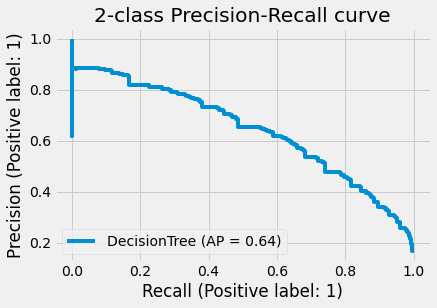

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    bestTree, X_test, y_test, name="DecisionTree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

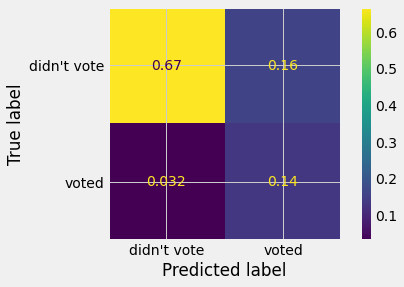

In [ ]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

In [ ]:

wandb.sklearn.plot_classifier(bestTree, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='DecisionTree', feature_names = X_train.columns)

wandb: 
wandb: Plotting DecisionTree.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lea

In [ ]:
wandb.finish()

In [ ]:
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(bestTree, filled=True)